# BBC021: Human MCF7 cells – compound-profiling experiment

In [1]:
# %load ../common_.py
import sys
sys.path.append("..")
from common import *

In [2]:
from aicsimageio.readers.tiff_glob_reader import TiffGlobReader
import re
import cellpose
from cellpose import models
from skimage.measure import regionprops

In [3]:
data_dir = Path("/user/gent/420/vsc42015/vsc_data_vo/datasets/BBBC021")

In [53]:
data_dir = Path("/home/maximl/scratch/data/vsc/datasets/BBBC021")

In [4]:
def map_to_index(f):
    idx = re.match("^.*_w([0-9]).*$", f).group(1)
    m = {"1": 0, "2": 1, "4": 2}
    return pandas.Series(
        dict(S=0, T=0, C=m[idx], Z=0)
    )

im = TiffGlobReader(
    glob_in=sorted([str(p) for p in data_dir.glob("debug/Week1_150607_B02_s1_w*.tif")]),
    indexer=map_to_index,
    channel_names=["DAPI", "Tubulin", "Actin"]
)

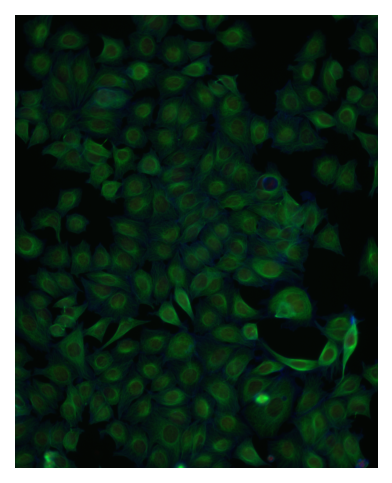

In [5]:
pixels = im.get_image_data("XYC")

fig, ax = plt.subplots(dpi=150)
ax.imshow(pixels / pixels.reshape(1, -1).max(axis=1))
ax.set_axis_off()

In [7]:
import tifffile

In [35]:
tifffile.imwrite(data_dir / "debug/test1_1.tiff", im.get_image_data("CYX")[0, :100, :100].astype("uint16"))
tifffile.imwrite(data_dir / "debug/test1_2.tiff", im.get_image_data("CYX")[1, :100, :100].astype("uint16"))
tifffile.imwrite(data_dir / "debug/test2_1.tiff", im.get_image_data("CYX")[0, 100:200, 100:200].astype("uint16"))
tifffile.imwrite(data_dir / "debug/test2_2.tiff", im.get_image_data("CYX")[1, 100:200, 100:200].astype("uint16"))

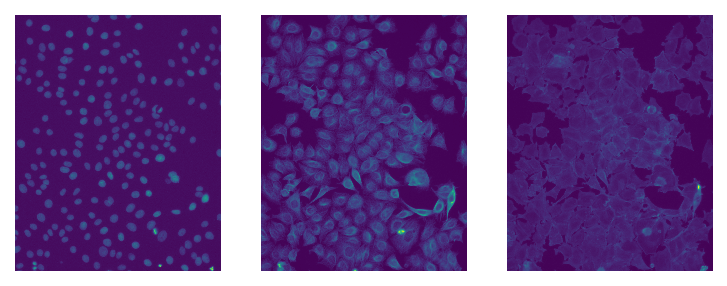

In [40]:
pixels = im.get_image_data("XYC")

fig, axes = plt.subplots(1, 3, dpi=150)
for ax, c in zip(axes, numpy.swapaxes(pixels / pixels.reshape(1, -1).max(axis=1), -1, 0)):
    ax.imshow(c.T)
    ax.set_axis_off()

In [41]:
model = models.Cellpose(gpu=True, model_type='cyto2')

2022-05-02 15:43:54,189 [INFO] ** TORCH CUDA version installed and working. **
2022-05-02 15:43:54,191 [INFO] >>>> using GPU


In [42]:
masks, flows, styles, diams = model.eval([pixels], diameter=None, channels=[3, 1])

2022-05-02 15:43:57,949 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-02 15:44:00,417 [WARNING] WARNING: not interp
2022-05-02 15:44:06,155 [INFO] estimated cell diameter(s) in 8.21 sec
2022-05-02 15:44:06,156 [INFO] >>> diameter(s) = 
2022-05-02 15:44:06,157 [INFO] [74.98, ]
2022-05-02 15:44:06,157 [INFO] ~~~ FINDING MASKS ~~~
2022-05-02 15:44:08,588 [INFO] >>>> TOTAL TIME 10.64 sec


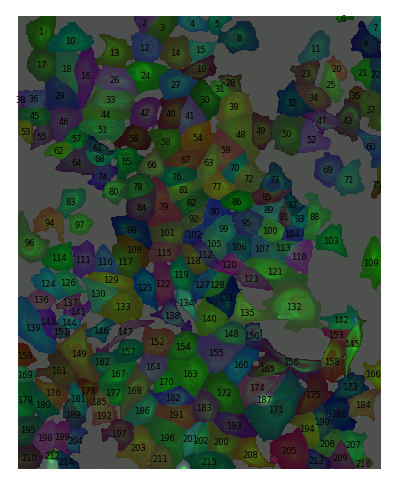

In [43]:
fig, ax = plt.subplots(1, 1, dpi=150)

ax.imshow(pixels / pixels.reshape(1, -1).max(axis=1))
ax.set_axis_off()

ax.imshow(cellpose.plot.mask_rgb(masks[0]), alpha=0.3)
for prop in regionprops(label_image=masks[0]):
    ax.text(prop.centroid[1], prop.centroid[0], prop.label, fontsize=4, ha="center", va="center")

In [48]:
masks2, flows2, styles2, diams2 = model.eval([pixels], diameter=None, channels=[2, 1], mask_threshold=0.2)

2022-05-02 15:46:51,697 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-02 15:46:54,010 [WARNING] WARNING: not interp
2022-05-02 15:46:59,265 [INFO] estimated cell diameter(s) in 7.57 sec
2022-05-02 15:46:59,268 [INFO] >>> diameter(s) = 
2022-05-02 15:46:59,268 [INFO] [72.67, ]
2022-05-02 15:46:59,269 [INFO] ~~~ FINDING MASKS ~~~
2022-05-02 15:47:01,570 [INFO] >>>> TOTAL TIME 9.87 sec


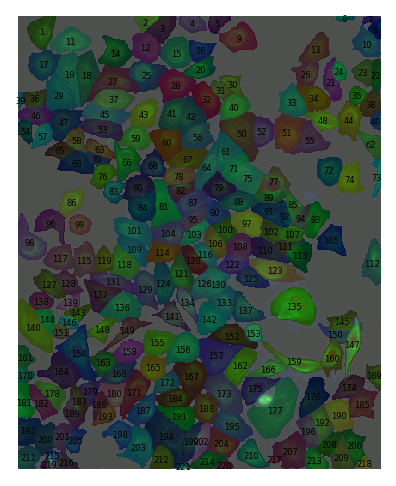

In [49]:
fig, ax = plt.subplots(1, 1, dpi=150)

ax.imshow(pixels / pixels.reshape(1, -1).max(axis=1))
ax.set_axis_off()

ax.imshow(cellpose.plot.mask_rgb(masks2[0]), alpha=0.3)
for prop in regionprops(label_image=masks2[0]):
    ax.text(prop.centroid[1], prop.centroid[0], prop.label, fontsize=4, ha="center", va="center")